In [29]:
import pandas as pd

df_salas = pd.read_csv("database\\direcciones_locales.csv", sep=";")
df_salas.head()

# df_salas.loc[0, "Lat"] / 10000000

,Código de Dirección,Nombre de Dirección,Cliente,Dirección,Comuna,Lat1,Lng1,Lat,Lng,Conductor designado
0,2859,57 - HI VITACURA,WALMART,Buenaventura 1770,Vitacura,-333868748,-70567914,-33.386875,-70.567914,Carlos Meneses
1,2886,97 - HI PTE NUEVO,WALMART,Av. Las Condes 12916,Lo Barnechea,-333696801,-705121767,-33.369680,-70.512177,Carlos Meneses
2,2780,J512 - J LA REINA,CENCOSUD,Av. Francisco Bilbao 8750,Las Condes,-334279259,-705408096,-33.427926,-70.540810,Carlos Meneses
3,2765,J511 - J COSTANERA,CENCOSUD,Avda. Andrés Bello 2465,Providencia,-334181063,-706082252,-33.418106,-70.608225,Carlos Meneses
4,2867,88 - HI LOS DOMINICOS,WALMART,Camino El Alba 11865,Las Condes,-334019711,-705158954,-33.401971,-70.515895,Carlos Meneses



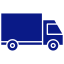

In [7]:
import folium
from geotab import ExtractorGeotab
import pandas as pd


df_salas = pd.read_csv("database\\direcciones_locales.csv", sep=";")

camion = ExtractorGeotab().obtener_ubicaciones("b347")
mapa = folium.Map(location=[camion["latitud"], camion["longitud"]], zoom_start=19)

icon_camion = folium.CustomIcon(
    icon_image="image\\camion.png",
    icon_size=(45,45)
)

icon_market = folium.CustomIcon(
    icon_image="image\\street-market.png",
    icon_size=(20, 20)
)

folium.Marker(
    location=[camion["latitud"], camion["longitud"]],
    popup="Camión 1254",
    icon=icon_camion
).add_to(mapa)

for index, row in df_salas.iterrows():
    try:
        folium.Marker(
            location=[float(row["Lat"]), float(row["Lng"])],
            popup=f"""
                Ruta {row['Código de Dirección']}\n
                {row["Nombre de Dirección"]}
                
                """,
            ).add_to(mapa)
            
    except Exception as e:
        print(f"Error al procesar la fila {index}: {e}")
    
    # print(f"{row["Lat"]},  {row["Lng"]} {row["Nombre de Dirección"]}")

mapa

In [10]:
for index, row in df_salas.iterrows():
    

<generator object DataFrame.iterrows at 0x000001EA495E7CD0>

In [8]:
from geotab import ExtractorGeotab

df_camiones = ExtractorGeotab().base_conductores()

In [9]:
df_camiones

,id,PAIS,NUMERO,ESTADO,CODIGO,LETRA
0,b347,CL,1256,CONE,8776,L
1,b38F,CL,1327,2264,8777,I
2,b135,CL,1205,BAJA,VENDIDO CON GPS,None
3,b5C,CL,4093,4911,8777,D
4,b3C7,CL,0050,TRAN,2651,T
...,...,...,...,...,...,...
60,b339,CL,1193,SUPL,8775,D
61,b4A4,CL,2083,SUPE,8776,A
62,b4A7,CL,2679,0358,8775,D
63,b3C9,CL,1261,AASS,8776,A


In [4]:
import pandas as pd
from geotab import ExtractorGeotab


lista_camiones = ExtractorGeotab().obtener_dispositivos()

In [18]:
df = pd.DataFrame(lista_camiones)
df.head()

,id,name
0,b347,CL/1256/CONE/8776/L
1,b38F,CL/1327/2264/8777/I
2,b135,CL/1205/BAJA/VENDIDO CON GPS
3,b5C,CL/4093/4911/8777/D
4,b3C7,CL/0050/TRAN/2651/T


In [31]:
df[["PAIS", "NUMERO", "ESTADO", "CODIGO", "LETRA"]] = df["name"].str.split("/", expand=True)

In [32]:
df

,id,name,PAIS,NUMERO,ESTADO,CODIGO,LETRA
0,b347,CL/1256/CONE/8776/L,CL,1256,CONE,8776,L
1,b38F,CL/1327/2264/8777/I,CL,1327,2264,8777,I
2,b135,CL/1205/BAJA/VENDIDO CON GPS,CL,1205,BAJA,VENDIDO CON GPS,None
3,b5C,CL/4093/4911/8777/D,CL,4093,4911,8777,D
4,b3C7,CL/0050/TRAN/2651/T,CL,0050,TRAN,2651,T
...,...,...,...,...,...,...,...
60,b339,CL/1193/SUPL/8775/D,CL,1193,SUPL,8775,D
61,b4A4,CL/2083/SUPE/8776/A,CL,2083,SUPE,8776,A
62,b4A7,CL/2679/0358/8775/D,CL,2679,0358,8775,D
63,b3C9,CL/1261/AASS/8776/A,CL,1261,AASS,8776,A
